In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

os.getcwd()

'/mnt/d/lecture/OpenCV_Python_Tutorial/DIP'

In [4]:
src = cv2.imread('../images/apple.jpg')
if src is None:
    print('There is not the image to read!')

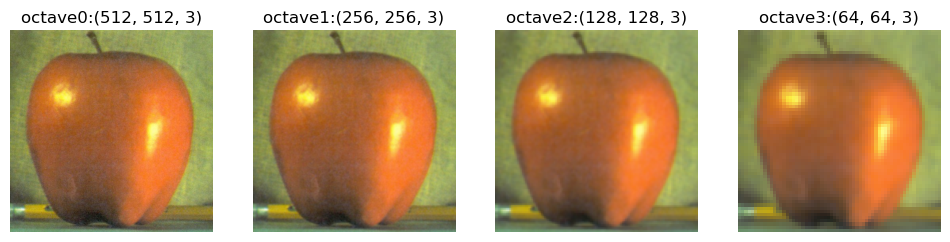

In [5]:
octave = src.copy()[...,::-1]
plt.figure(figsize=(12,5))
for i in range(4):
    
    if i == 0:
        plt.subplot(1,4,i+1)
        plt.title(f'octave{i}:{octave.shape}')
        plt.imshow(octave)
        plt.axis('off')
    else:    
        octave = cv2.pyrDown(octave)
        plt.subplot(1,4,i+1)
        plt.title(f'octave{i}:{octave.shape}')
        plt.imshow(octave)
        plt.axis('off')
    

uint8
uint8
uint8
uint8


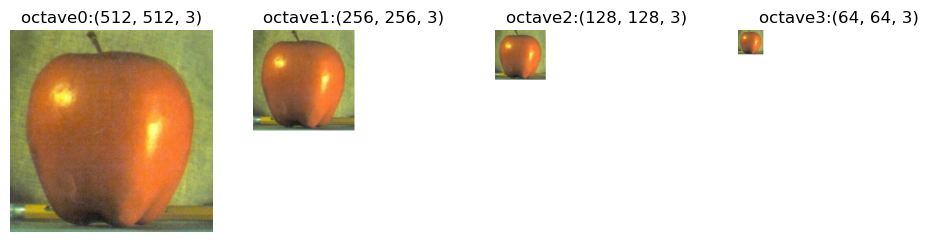

In [18]:
def padding (img,h):
    print(img.dtype)
    
    if img.ndim == 3:
        i = np.ones((h,h,img.shape[2]),dtype='uint8')*255
    else:
        i = np.ones((h,h), dtype='uint8')*255
    i[0:img.shape[0],0:img.shape[1]]=img[:,:]
    return i
    
octave = src.copy()[...,::-1]
octaves = [octave]
h = src.shape[0]

for i in range (3):
    octave = cv2.pyrDown(octave)
    octaves.append(octave)
    
plt.figure(figsize=(12,5))
for i in range(len(octaves)):
    
    tmp = padding(octaves[i],h)
    plt.subplot(1, len(octaves), i+1)
    plt.title(f'octave{i}:{octaves[i].shape}')
    plt.imshow(tmp)
    plt.axis('off')

In [19]:
def gen_g_pyra (img, num_octave = 6):
    # generate Gaussian pyramid for A
    G = img.copy()
    gp = [G]
    for i in range(num_octave-1):
        G = cv2.pyrDown(G)
        gp.append(G)
    return gp

In [20]:
A = cv2.imread('../images/apple.jpg')
B = cv2.imread('../images/orange.jpg')

gp_A = gen_g_pyra(A)
gp_B = gen_g_pyra(B)

In [21]:
for i in gp_A:
    print(i.shape)

(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)


# Laplacian Pyramids



In [22]:
def gen_l_pyra_dog (img, num_octave=5):
    
    gp = gen_g_pyra(img, num_octave+1)
    print(len(gp))
    lp = [gp[num_octave]]
    for i in range(num_octave,0,-1):
        GE = cv2.pyrUp(gp[i])
        L = cv2.subtract(gp[i-1],GE)
        lp.append(L)
    return lp

In [23]:
lp_A = gen_l_pyra_dog(A,5)
lp_B = gen_l_pyra_dog(B,5)

for i in lp_A:
    print(i.shape)

6
6
(16, 16, 3)
(32, 32, 3)
(64, 64, 3)
(128, 128, 3)
(256, 256, 3)
(512, 512, 3)


(16, 16, 3)
(32, 32, 3)
(64, 64, 3)
(128, 128, 3)
(256, 256, 3)
(512, 512, 3)


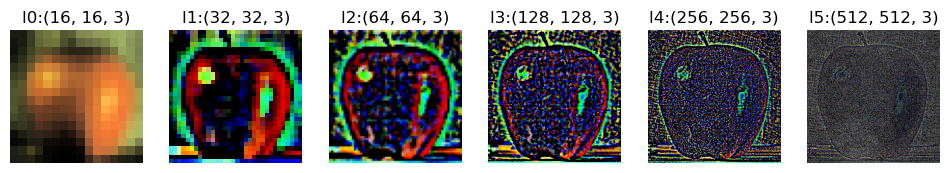

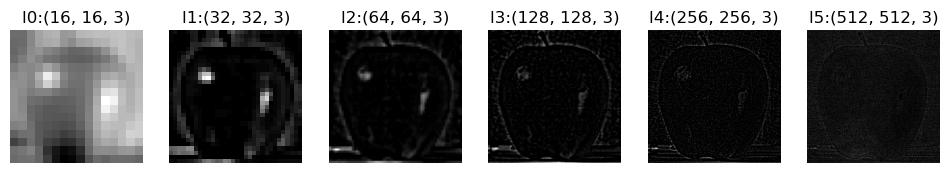

In [43]:
plt.figure(figsize=(12,5))
for i in range(len(lp_A)):
    
    # tmp = cv2.normalize(lp_A[i][...,0],None,0,255,cv2.NORM_MINMAX)
    tmp = lp_A[i].copy()[...,::-1]
    
    img_hsv = cv2.cvtColor(tmp,cv2.COLOR_RGB2HSV)
    img_hsv[...,2] = cv2.equalizeHist(img_hsv[:,:,2])
    tmp = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
    
    print(tmp.shape)
    
    # tmp = padding(tmp,h)
    plt.subplot(1, len(lp_A), i+1)
    plt.title(f'l{i}:{lp_A[i].shape}')
    plt.imshow(tmp)
    plt.axis('off')
    
plt.figure(figsize=(12,5))
for i in range(len(lp_A)):
    
    # tmp = cv2.normalize(lp_A[i][...,0],None,0,255,cv2.NORM_MINMAX)
    tmp = lp_A[i].copy()[...,::-1]
    
    img_gray = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)
    
    # tmp = padding(tmp,h)
    plt.subplot(1, len(lp_A), i+1)
    plt.title(f'l{i}:{lp_A[i].shape}')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

In [146]:
# Now add left and right halves of images in each level
LS = []
xxx = 0
for la,lb in zip(lp_A,lp_B):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)
    
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    print(ls_.shape, LS[i].shape)
    ls_ = cv2.add(ls_, LS[i])

(32, 32, 3) (32, 32, 3)
(64, 64, 3) (64, 64, 3)
(128, 128, 3) (128, 128, 3)
(256, 256, 3) (256, 256, 3)
(512, 512, 3) (512, 512, 3)


In [147]:
def ds_show(idx, img, title):
    img = img[...,::-1]
    
    plt.subplot(2,2,idx), 
    plt.imshow(img)
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    

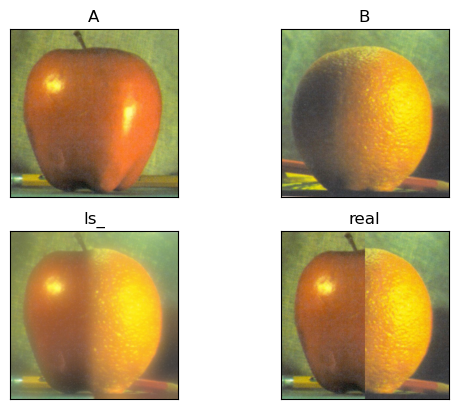

In [148]:
# image with direct connecting each half
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))

ds_show(1,A,'A')
ds_show(2,B,'B')
ds_show(3,ls_,'ls_')
ds_show(4,real,'real')


In [42]:
np.sqrt(1.6**2-1)

1.2489995996796799

# SIFT

https://medium.com/@russmislam/implementing-sift-in-python-a-complete-guide-part-1-306a99b50aa5

In [66]:
import logging


logger = logging.getLogger(__name__)

def generateBaseImage(image, sigma = 1.6, assumed_blur = 0.5):
    """Generate base image from input image by upsampling by 2 in both directions and blurring
    """
    logger.debug('Generating base image...')
    image = cv2.resize(image, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    sigma_diff = np.sqrt(max((sigma ** 2) - ((2 * assumed_blur) ** 2), 0.01))
    print(sigma_diff**2)
    return cv2.GaussianBlur(image, 
                            (0, 0), 
                            sigmaX=sigma_diff, 
                            sigmaY=sigma_diff
                            )  # the image blur is now sigma instead of assumed_blur
    
image = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY).astype('float32')
base_img = generateBaseImage(image)


1.5600000000000005


In [67]:
def computeNumberOfOctaves(image_shape):
    """Compute number of octaves in image pyramid as function of base image shape (OpenCV default)
    """
    return int(np.round(np.log(np.min(image_shape)) / np.log(2) - 1))

num_octave = computeNumberOfOctaves(base_img.shape)
num_octave

9

In [68]:
np.sqrt(1.6**2-1)

1.2489995996796799

In [69]:
np.sqrt(2)

1.4142135623730951

In [70]:
def generateGaussianKernels(sigma = 1.6, num_intervals = 3):
    """Generate list of gaussian kernels at which to blur the input image. 
    Default values of sigma, intervals, and octaves follow section 3 of Lowe's paper.
    """
    logger.debug('Generating scales...')
    num_images_per_octave = num_intervals + 3
    k = 2 ** (1. / num_intervals)
    gaussian_kernels = np.zeros(num_images_per_octave)  # scale of gaussian blur necessary to go from one blur scale to the next within an octave
    gaussian_kernels[0] = sigma

    for image_index in range(1, num_images_per_octave):
        sigma_previous = (k ** (image_index - 1)) * sigma
        sigma_total = k * sigma_previous
        gaussian_kernels[image_index] = np.sqrt(sigma_total ** 2 - sigma_previous ** 2)
    return gaussian_kernels

gaussian_kernels = generateGaussianKernels()

In [71]:
gaussian_kernels

array([1.6       , 1.2262735 , 1.54500779, 1.94658784, 2.452547  ,
       3.09001559])

In [72]:
(2 ** (1/6) ) **6

2.0000000000000004

In [106]:
def generateGaussianImages(image, num_octaves, gaussian_kernels):
    """Generate scale-space pyramid of Gaussian images
    """
    logger.debug('Generating Gaussian images...')
    gaussian_images = []

    for octave_index in range(num_octaves):
        gaussian_images_in_octave = []
        gaussian_images_in_octave.append(image)  # first image in octave already has the correct blur
        for gaussian_kernel in gaussian_kernels[1:]:
            image = cv2.GaussianBlur(image, (0, 0), sigmaX=gaussian_kernel, sigmaY=gaussian_kernel)
            print(image.shape)
            gaussian_images_in_octave.append(image)
        print(len(gaussian_images_in_octave))
        gaussian_images.append(gaussian_images_in_octave)
        octave_base = gaussian_images_in_octave[-3]
        image = cv2.resize(octave_base, 
                           (int(octave_base.shape[1] / 2), int(octave_base.shape[0] / 2)), 
                           interpolation=cv2.INTER_NEAREST)
    return gaussian_images

gaussian_images = generateGaussianImages(base_img, num_octave, gaussian_kernels)

(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
6
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
6
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
6
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
6
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
6
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
6
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
6
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
6
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
6


In [109]:
def generateDoGImages(gaussian_images):
    """Generate Difference-of-Gaussians image pyramid
    """
    logger.debug('Generating Difference-of-Gaussian images...')
    dog_images = []

    for gaussian_images_in_octave in gaussian_images:
        dog_images_in_octave = []
        for first_image, second_image in zip(gaussian_images_in_octave, gaussian_images_in_octave[1:]):
            dog_images_in_octave.append(cv2.subtract(second_image, first_image))  # ordinary subtraction will not work because the images are unsigned integers
        dog_images.append(dog_images_in_octave)
    return dog_images

In [110]:
dog_images = generateDoGImages(gaussian_images)

In [111]:
len(dog_images)

9

In [114]:
np.array(dog_images[0]).shape

(5, 1024, 1024)

In [116]:
np.array(dog_images[1]).shape

(5, 512, 512)